# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | al hilaliyya
Processing Record 3 of Set 1 | mont-dore
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | bumba
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | victoria falls
Processing Record 9 of Set 1 | stolin
Processing Record 10 of Set 1 | castillos
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | ribeira brava
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | happy valley-goose bay
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ust'-kulom
Processing Record 19 of Set 1 | itaituba
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | mugia
Processing Record 22 of Set 1 | papatowai
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,13.34,65,75,3.45,AU,1691132070
1,al hilaliyya,14.9398,33.2340,30.37,54,81,6.11,SD,1691132576
2,mont-dore,-22.2833,166.5833,20.56,99,100,6.82,NC,1691132576
3,emerald,-23.5333,148.1667,24.08,32,0,4.99,AU,1691132577
4,kodiak,57.7900,-152.4072,12.73,88,75,0.00,US,1691132082


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.34,65,75,3.45,AU,1691132070
1,al hilaliyya,14.9398,33.2340,30.37,54,81,6.11,SD,1691132576
2,mont-dore,-22.2833,166.5833,20.56,99,100,6.82,NC,1691132576
3,emerald,-23.5333,148.1667,24.08,32,0,4.99,AU,1691132577
4,kodiak,57.7900,-152.4072,12.73,88,75,0.00,US,1691132082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

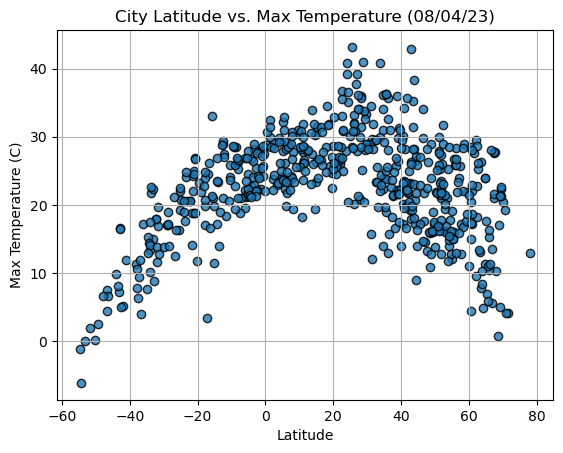

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

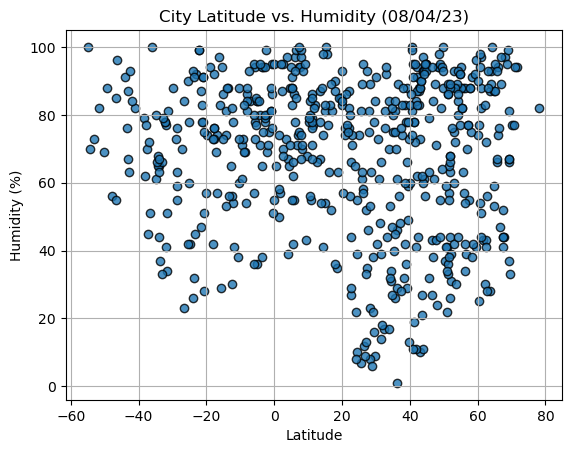

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

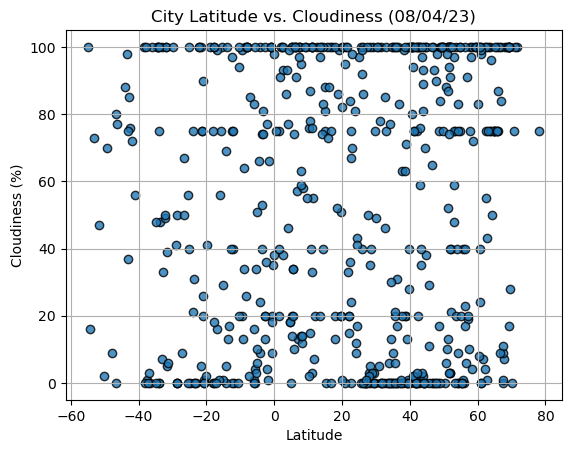

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

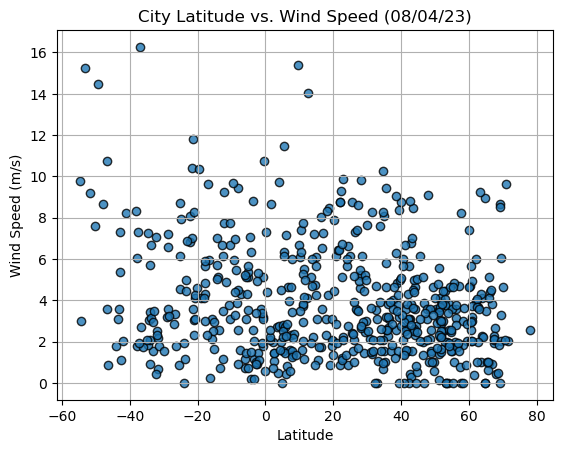

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, annotate_cordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_cordinates, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()
    

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,al hilaliyya,14.9398,33.2340,30.37,54,81,6.11,SD,1691132576
4,kodiak,57.7900,-152.4072,12.73,88,75,0.00,US,1691132082
5,bumba,2.1833,22.4667,23.80,87,100,1.96,CD,1691132577
8,stolin,51.8912,26.8460,21.06,68,91,2.86,BY,1691132579
11,ribeira brava,32.6500,-17.0667,23.34,81,46,3.51,PT,1691132580


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.34,65,75,3.45,AU,1691132070
2,mont-dore,-22.2833,166.5833,20.56,99,100,6.82,NC,1691132576
3,emerald,-23.5333,148.1667,24.08,32,0,4.99,AU,1691132577
6,kone,-21.0595,164.8658,18.80,78,90,3.06,NC,1691132064
7,victoria falls,-17.9235,25.8430,17.04,42,0,4.29,ZW,1691132578


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5126833377998108


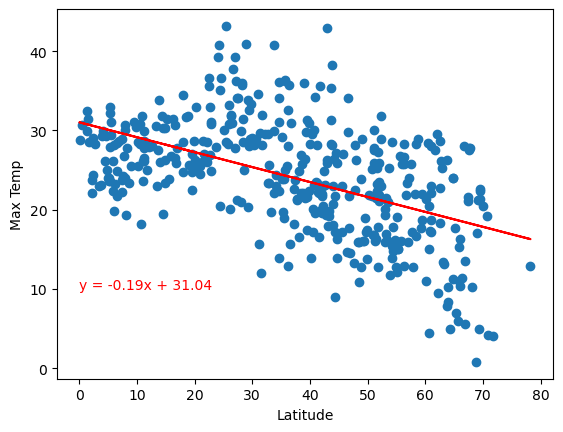

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
annotate_cordinates = (0,10)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

The r-value is: 0.8123630625492402


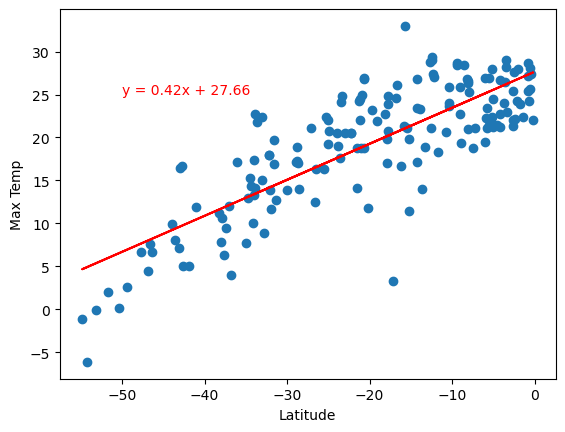

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
annotate_cordinates = (-50,25)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

**Discussion about the linear relationship:** Based on the linear relationship it appears that a city's maximum temperature increases the closer the latitude is to zero.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03397387272326742


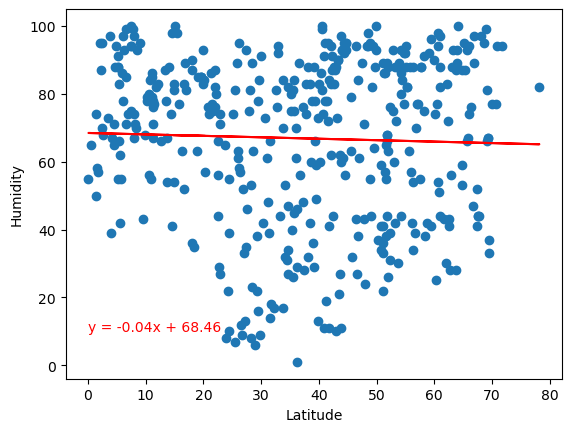

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotate_cordinates = (0,10)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

The r-value is: 0.09775339205517665


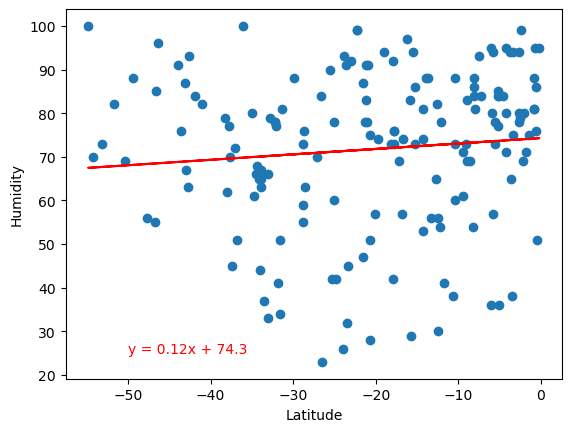

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotate_cordinates = (-50,25)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

**Discussion about the linear relationship:** Based on the linear relationship it appears that a city's humidity decreases the further you are from latitude zero.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006355697452908117


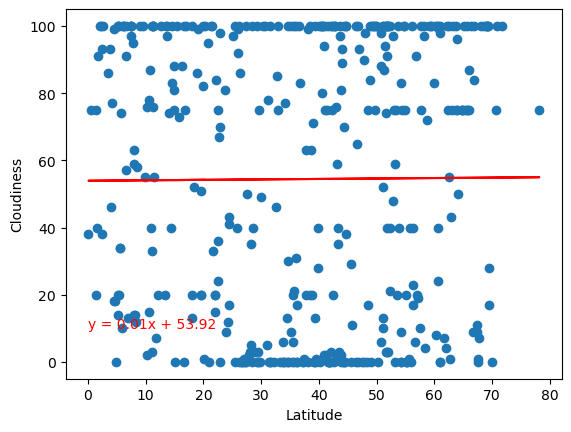

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotate_cordinates = (0,10)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

The r-value is: -0.03777152382341919


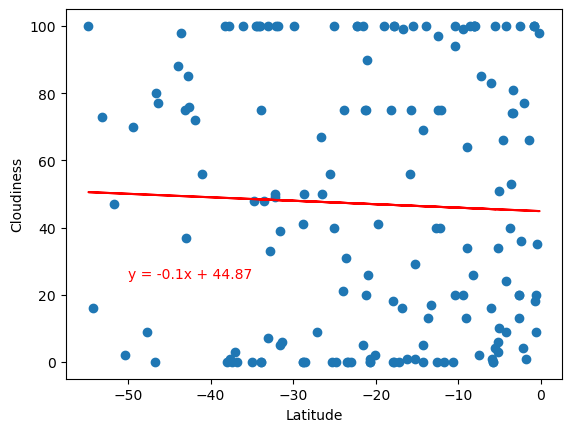

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotate_cordinates = (-50,25)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

**Discussion about the linear relationship:** Based on the linear relationship it appears that a city's cloudiness slightly increases the further away from latitude zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15068255990799975


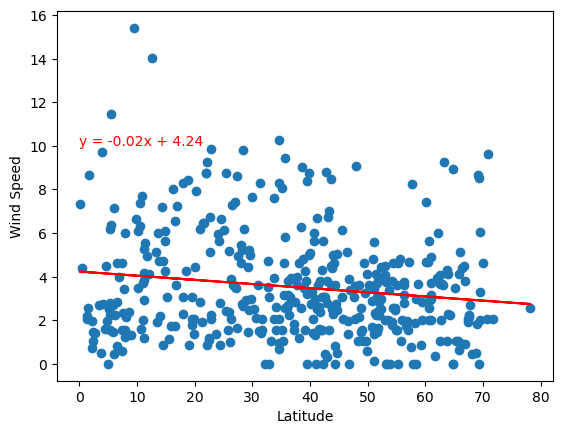

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotate_cordinates = (0,10)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

The r-value is: -0.2202109928499273


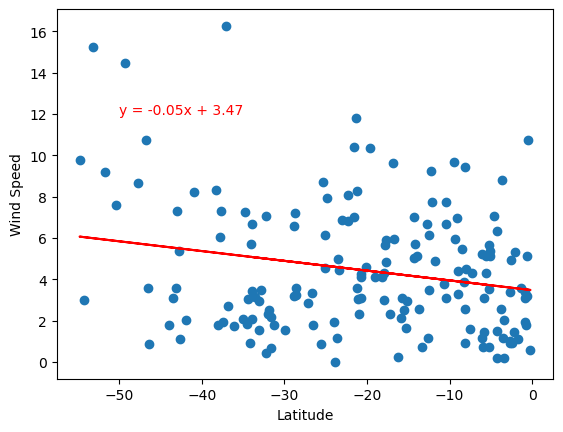

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotate_cordinates = (-50,12)
plot_linear_regression(x_values,y_values, x_label, y_label, annotate_cordinates)

**Discussion about the linear relationship:** Based on the linear relationship, it appears that wind speed decreases the further away from latitude zero in the northern hemispher and increases the further away from latitude zero in the southern hemisphere.